# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lesson 14/netflix_users_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [5]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Приведение столбцов к стилю camel_case

In [6]:
import re

def camel_case_column_name(column_name):
    # Заменяем спецсимволы и разделители на пробелы
    cleaned = re.sub(r'[^a-zA-Z0-9]', ' ', column_name)
    # Разделяем на слова по пробелам и CamelCase
    words = re.split(r' +|(?<=[a-z0-9])(?=[A-Z])', cleaned)
    # Собираем CamelCase, игнорируя пустые строки
    return ''.join([word.capitalize() for word in words if word.strip()])

# Переименовываем столбцы
df.columns = [camel_case_column_name(col) for col in df.columns]

# Выводим результат
df.head()

,UserId,SubscriptionType,MonthlyRevenue,JoinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Приведение типов данных

# Поиск дублей и пропусков в данных

In [7]:
f"Количество дубликатов перед удалением: {df.duplicated().sum()}"

'Количество дубликатов перед удалением: 0'

In [8]:
# Проверка пропусков
df.isnull().sum()

,0
UserId,0
SubscriptionType,0
MonthlyRevenue,0
JoinDate,0
LastPaymentDate,0
Country,0
Age,0
Gender,0
Device,0
PlanDuration,0


In [9]:
#привести дату к типу datetime
df['JoinDate'] = pd.to_datetime(
    df['JoinDate'],
    format='%d-%m-%y')
df['LastPaymentDate'] = pd.to_datetime(
    df['LastPaymentDate'],
    format='%d-%m-%y'
)

In [10]:
df

,UserId,SubscriptionType,MonthlyRevenue,JoinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


# Исследовательский анализ данных

In [11]:
df

,UserId,SubscriptionType,MonthlyRevenue,JoinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


## Анализ уникальных пользователей

In [12]:
# Анализ уникальных пользователей
unique_users = df['UserId'].nunique()
min_date = df['JoinDate'].min().strftime('%Y-%m-%d')
max_date = df['JoinDate'].max().strftime('%Y-%m-%d')
print(f"Уникальные пользователи: {unique_users}")
print(f"Период: с {min_date} по {max_date}")

Уникальные пользователи: 2500
Период: с 2021-09-05 по 2023-06-14


## Возраст пользователей

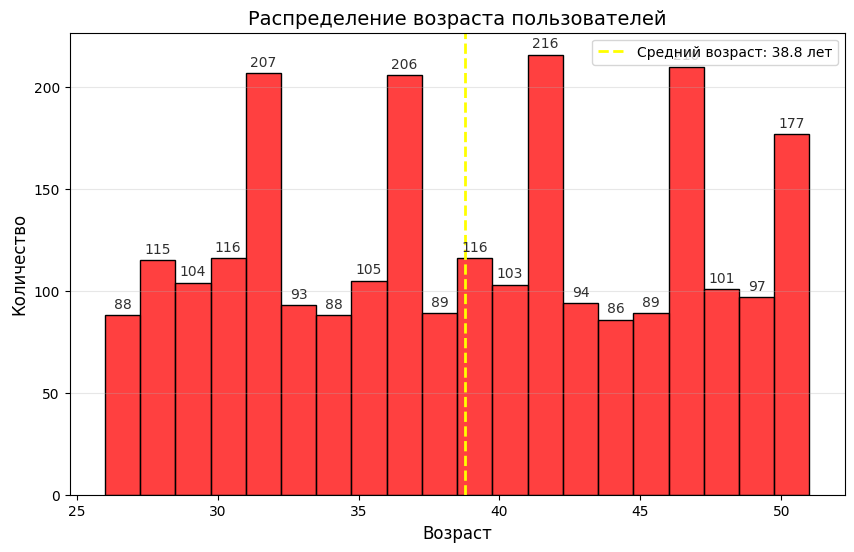

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Замена на красную палитру (с использованием "Reds")
red_cmap = sns.color_palette("Reds", as_cmap=True)
# Создаем красную палитру
red_colors = ['#ff0000', '#ff3333', '#ff6666', '#ff9999', '#ffcccc']  # Примеры красных цветов

# Визуализация возраста
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Age'], bins=20, kde=False, color='#ff0000')

# Рассчитываем средний возраст
mean_age = df['Age'].mean()

# Добавляем линию среднего значения
plt.axvline(mean_age, color='yellow', linestyle='--', linewidth=2, label=f'Средний возраст: {mean_age:.1f} лет')

# Добавляем метки на каждый столбец
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:  # Пропускаем пустые столбцы
        ax.text(
            x=rect.get_x() + rect.get_width()/2,  # Центр столбца
            y=height + 2,  # Смещение выше вершины
            s=f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='#2F2F2F'
        )

# Настройка оформления
plt.title('Распределение возраста пользователей', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

Средний возраст пользователей 38,8 лет.

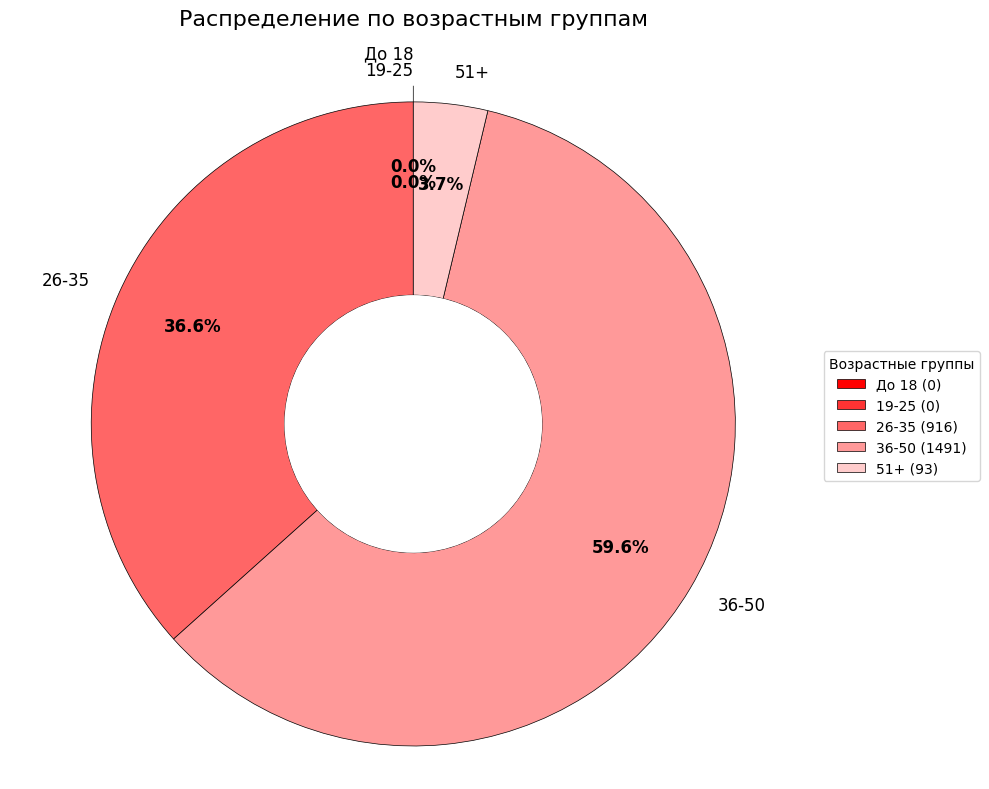

In [32]:
# Создаем возрастные группы
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['До 18', '19-25', '26-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Считаем распределение
age_distribution = df['Age Group'].value_counts().sort_index()

# Палитра желтых оттенков
yellow_palette = [
    '#FFF9C4',
    '#FFEE58',
    '#FFD54F',
    '#FFB300',
    '#F57F17'
]

plt.figure(figsize=(10, 8))
explode = (0.05, 0, 0, 0, 0)

wedges, texts, autotexts = plt.pie(
    age_distribution,
    labels=age_labels,
    colors=red_colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.75,  # Подвигаем проценты ближе к краю отверстия
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 0.5,
        'width': 0.6  # Ширина кольца (0.6 = 60% радиуса)
    }
)

# Добавляем белый круг в центре для эффекта отверстия
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
plt.gca().add_artist(centre_circle)

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_weight('bold')
    autotext.set_size(12)

# Настройка заголовка и легенды
plt.title('Распределение по возрастным группам', fontsize=16, pad=20)
plt.legend(
    title='Возрастные группы',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    labels=[f'{label} ({val})' for label, val in zip(age_labels, age_distribution)]
)

plt.axis('equal')
plt.tight_layout()
plt.show()

Основные возрастные группы пользователей - 26-35 лет (36,6%) и 36-50 лет (59,6%).

## Пол пользователей

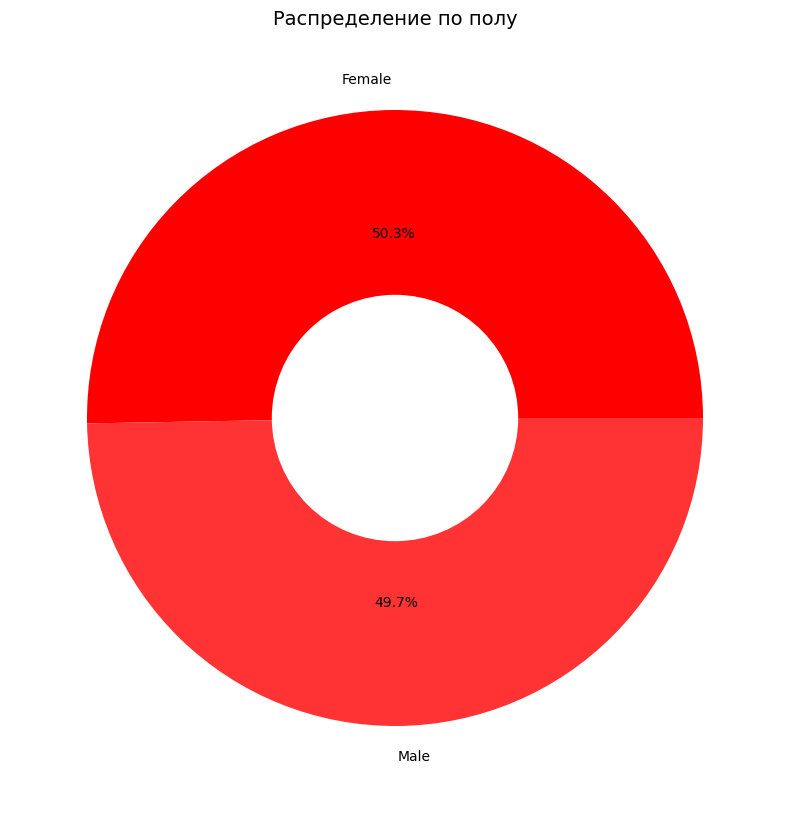

In [33]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=red_colors)
plt.title('Распределение по полу', fontsize=14)
# Добавляем белый круг в центре для эффекта отверстия
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
plt.gca().add_artist(centre_circle)
plt.show()

По половому признаку пользователи поделены 50/50.

## Девайсы пользователей

<ipython-input-34-4a1625431910>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-34-4a1625431910>:8: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



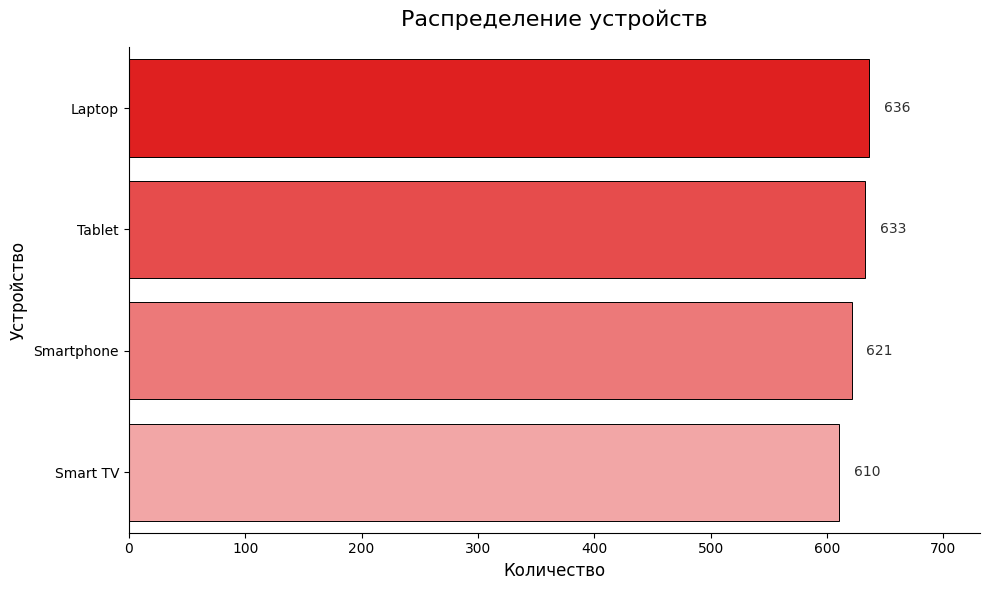

In [34]:
# Визуализация устройств
device_counts = df['Device'].value_counts()

# Создаем золотистую палитру
gold_palette = ['#FFD700', '#FFE55C', '#FFEE99', '#FFF3B2', '#FFF9D9']

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=device_counts.values,
    y=device_counts.index,
    palette=red_colors,
    edgecolor='black',
    linewidth=0.7
)

# Добавляем метки данных
for i, (name, value) in enumerate(device_counts.items()):
    ax.text(
        x=value + max(device_counts)*0.02,  # Смещение справа от столбца
        y=i,
        s=f'{value:,}',  # Формат с разделителями тысяч
        va='center',
        ha='left',
        fontsize=10,
        color='#2F2F2F'
    )

plt.title('Распределение устройств', fontsize=16, pad=15)
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Устройство', fontsize=12)
plt.xlim(0, max(device_counts)*1.15)  # Расширяем ось X для меток

# Убираем рамку
sns.despine(left=False)

plt.tight_layout()
plt.show()

Пользователи используют все типы устройств одинаково часто.

## Тип подписки пользователей

<ipython-input-17-83e44b311185>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(  # Сохраняем объект оси в переменную ax


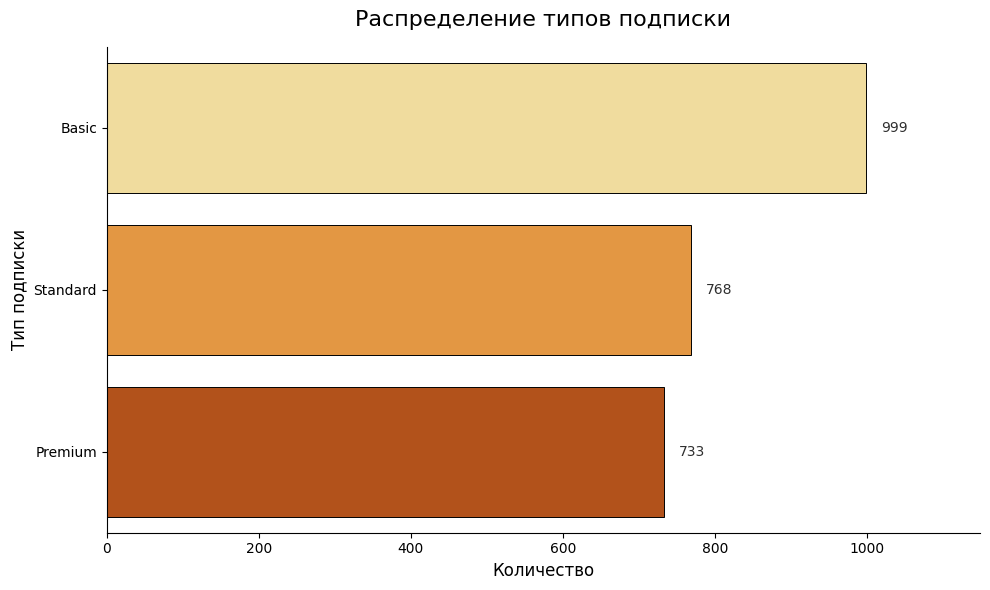

In [17]:
# Визуализация типов подписки
subscription_counts = df['SubscriptionType'].value_counts()

# Золотистая палитра (если не определена ранее)
gold_palette = ['#FFD700', '#FFE55C', '#FFEE99', '#FFF3B2', '#FFF9D9']

plt.figure(figsize=(10, 6))
ax = sns.barplot(  # Сохраняем объект оси в переменную ax
    x=subscription_counts.values,
    y=subscription_counts.index,
    palette='YlOrBr',
    edgecolor='black',
    linewidth=0.7
)

# Добавляем метки данных
for i, (name, value) in enumerate(subscription_counts.items()):
    ax.text(
        x=value + subscription_counts.max() * 0.02,  # Используем max() от Series
        y=i,
        s=f'{value:,}',
        va='center',
        ha='left',
        fontsize=10,
        color='#2F2F2F'
    )

# Единый заголовок и метки
plt.title('Распределение типов подписки', fontsize=16, pad=15)  # Исправленный заголовок
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Тип подписки', fontsize=12)  # Исправленная метка оси Y
plt.xlim(0, subscription_counts.max() * 1.15)

# Убираем правую и верхнюю рамки
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()

Ожидаемо, количество пользователей с базовой подпиской выше. Однако, отставание других типов подписок невелико.

## Локация пользователей

In [18]:
yellow_palette_20 = [
    '#FFFDE7', '#FFF9C4', '#FFF59D', '#FFF176', '#FFEE58',
    '#FFEB3B', '#FDD835', '#FBC02D', '#F9A825', '#F57F17',
    '#FFD700', '#FFD54F', '#FFDC73', '#FFE08C', '#FFE4A0',
    '#FFE8B5', '#FFECB3', '#FFF3CD', '#FFE87C', '#FFDF00'
]

<ipython-input-19-ffdfaeaabac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


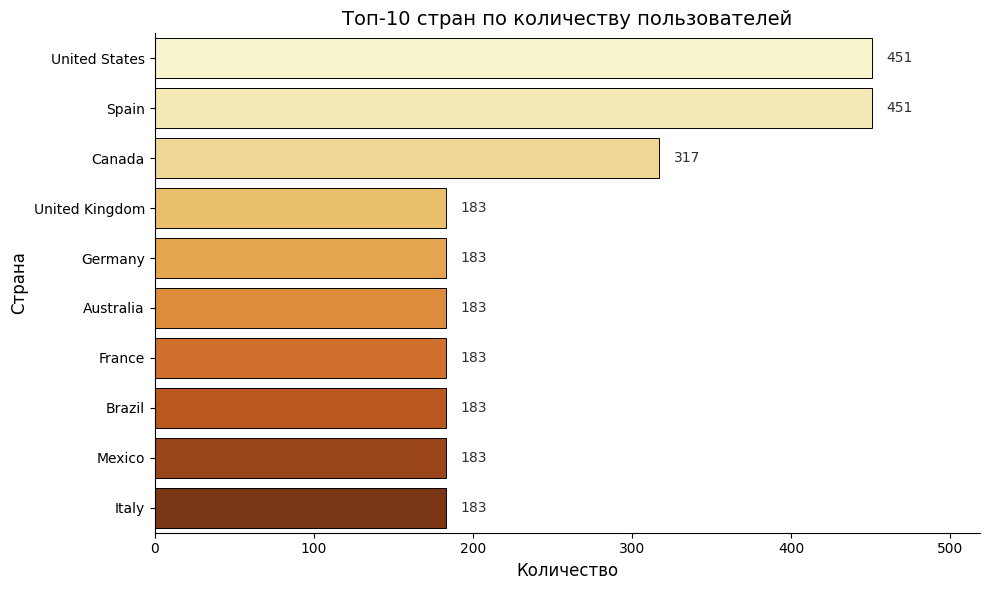

In [19]:
# Визуализация стран
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    palette='YlOrBr',
    edgecolor='black',  # Добавляем границы столбцов
    linewidth=0.7
)

# Добавляем метки данных
for i, (country, count) in enumerate(country_counts.items()):
    ax.text(
        x=count + max(country_counts)*0.02,  # Смещение справа от столбца
        y=i,
        s=f'{count:,}',  # Формат с разделителями тысяч
        va='center',
        ha='left',
        fontsize=10,
        color='#2F2F2F'
    )

plt.title('Топ-10 стран по количеству пользователей', fontsize=14)
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.xlim(0, max(country_counts)*1.15)  # Расширяем ось X для меток

sns.despine()  # Убираем верхнюю и правую границы
plt.tight_layout()
plt.show()

Топ-3 страны по количеству пользователей - United States, Spain, Canada

In [20]:
import plotly.express as px

# Группируем данные по странам
country_rev = df.groupby('Country')['MonthlyRevenue'].sum().reset_index()

# Создаем карту
fig = px.choropleth(
    country_rev,
    locations='Country',          # Столбец с названиями стран
    locationmode='country names', # Исправленный параметр (нижний регистр!)
    color='MonthlyRevenue',      # Данные для цветовой шкалы
    hover_name='Country',         # Подсказки при наведении
    color_continuous_scale='YlOrBr',
    title='Выручка по странам',
    width=1000,  # Ширина в пикселях
    height=500   # Высота в пикселях
)

fig.show()

Хоть и по количесту пользователей в United States и Canada одинаковое, в United States выручка выше, что говорит о том, что там пользователи предпочитают более дорогую подписку или оформили подписку раньше.

## Динамика привлечения пользователей

In [21]:
# Строим график
fig = px.line(
    monthly_users,
    x='join_month',
    y='counts',
    markers=True,
    title='Динамика привлечения пользователей',
    labels={'join_month': 'Месяц', 'counts': 'Пользователи'},
    line_shape='spline',
    color_discrete_sequence=['#FFB300']
)

# Настраиваем оси
fig.update_xaxes(
    title_text='Месяц',
    tickangle=45,
    type='category',
    showline=True,               # Показывать линию оси X
    linecolor='black',           # Цвет линии оси X
    linewidth=2,                 # Толщина линии оси X
    mirror=False,                 # Отразить линию на противоположной стороне
    gridcolor='lightgray',       # Цвет сетки по X
    gridwidth=0.5                # Толщина линий сетки
)

fig.update_yaxes(
    title_text='Количество пользователей',
    showline=True,               # Показывать линию оси Y
    linecolor='black',           # Цвет линии оси Y
    linewidth=2,                 # Толщина линии оси Y
    mirror=False,                 # Отразить линию на противоположной стороне
    gridcolor='lightgray',       # Цвет сетки по Y
    gridwidth=0.5,               # Толщина линий сетки
    zeroline=False               # Убрать линию нулевой отметки
)

fig.update_layout(
    hovermode='x unified',
    width=1000,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Добавляем аннотацию пикового значения
peak_month = monthly_users.loc[monthly_users['counts'].idxmax()]
fig.add_annotation(
    x=peak_month['join_month'],
    y=peak_month['counts'],
    text=f"Пик: {peak_month['counts']}",
    showarrow=True,
    arrowhead=2,
    ax=-50,
    ay=-40
)

fig.show()

NameError: name 'monthly_users' is not defined

С мая 2022 года по декабрь 2022 года Netflix активно привлекал пользователей. Возможно, была запущена хорошая маркетинговая история.

## Динамика выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

In [ ]:
import pandas as pd
import plotly.express as px
from pandas.tseries.offsets import MonthEnd

# Преобразуем даты к формату месяца
df['join_month'] = df['JoinDate'].dt.to_period('M').dt.to_timestamp()
df['last_payment_month'] = df['LastPaymentDate'].dt.to_period('M').dt.to_timestamp()

# Создаем список месяцев активности для каждого пользователя
df['active_months'] = df.apply(
    lambda x: pd.date_range(start=x['join_month'],
                           end=x['last_payment_month'],
                           freq='M'),
    axis=1
)

# "Разворачиваем" список месяцев в отдельные строки
df_exploded = df.explode('active_months')

# Группируем по месяцам и считаем накопленную выручку
cumulative_revenue = df_exploded.groupby('active_months')['MonthlyRevenue'].sum().cumsum().reset_index()
cumulative_revenue.columns = ['Month', 'CumulativeRevenue']

# Визуализация
fig = px.area(
    cumulative_revenue,
    x='Month',
    y='CumulativeRevenue',
    title='Накопленная выручка сервиса',
    labels={'CumulativeRevenue': 'Накопленная выручка', 'Month': 'Месяц'},
    color_discrete_sequence=['#FFD700']
)

fig.update_layout(
    hovermode='x unified',
    xaxis=dict(
        title='Месяц',
        tickformat='%b %Y',
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title='Выручка',
        gridcolor='lightgray',
        tickprefix='$'
    ),
    plot_bgcolor='white',
    width=1200,
    height=600
)

fig.update_traces(
    line=dict(width=3),
    marker=dict(size=8)
)
fig.show()

Накопленная выручка за рассматриваемый период составила 319,5к.

## Определение самой платежеспособной группы пользователей по возрасту

In [ ]:
plt.figure(figsize=(12, 6))

# График среднего дохода
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data=age_group_stats,
    x='AgeGroup',
    y='AvgRevenue',
    palette='YlOrBr',
    edgecolor='black'
)

# Добавляем метки для среднего дохода
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.title('Средний доход по возрастным группам', pad=15)
plt.xlabel('Возрастная группа')
plt.ylabel('Средний доход ($)')

# График общего дохода
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    data=age_group_stats,
    x='AgeGroup',
    y='TotalRevenue',
    palette='YlOrBr',
    edgecolor='black'
)

# Добавляем метки для общего дохода
for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.title('Общий доход по возрастным группам', pad=15)
plt.xlabel('Возрастная группа')
plt.ylabel('Общий доход ($)')

plt.tight_layout()
plt.show()

In [ ]:
# По среднему доходу
most_valuable_avg = age_group_stats.loc[
    age_group_stats['AvgRevenue'].idxmax()
]

# По общему доходу
most_valuable_total = age_group_stats.loc[
    age_group_stats['TotalRevenue'].idxmax()
]

print(f'''
Самая платежеспособная группа (по среднему доходу):
{most_valuable_avg['AgeGroup']}
Средний доход: ${most_valuable_avg['AvgRevenue']:.2f}
Количество пользователей: {most_valuable_avg['Users']}

Самая платежеспособная группа (по общему доходу):
{most_valuable_total['AgeGroup']}
Общий доход: ${most_valuable_total['TotalRevenue']:.2f}
''')

## Зависимость типа тарифа от группы возраста пользователя

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем сводную таблицу
subscription_by_age = pd.crosstab(
    df['AgeGroup'],
    df['SubscriptionType'],
    normalize='index'  # Процентное распределение по строкам
)

# Визуализация тепловой картой
plt.figure(figsize=(10, 6))
sns.heatmap(
    subscription_by_age * 100,  # Проценты
    annot=True,
    fmt=".1f",
    cmap="YlOrBr",
    linewidths=0.5,
    cbar_kws={'label': '% пользователей'}
)
plt.title('Распределение типов подписки по возрастным группам', pad=15)
plt.xlabel('Тип подписки')
plt.ylabel('Возрастная группа')
plt.show()


Распределение подписок по возрастным группам одинаковое, что говорит о одинаковых предпочтениях в различных возрастных группах.

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df,
    x='AgeGroup',
    hue='SubscriptionType',
    palette='YlOrBr',
    edgecolor='black'
)

# Добавляем метки на каждый столбец
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',  # Исправлено: добавлены скобки ()
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Типы подписок по возрастным группам', pad=15)
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

## Зависимость типа тарифа от страны пользователя

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем сводную таблицу с нормализацией по строкам
subscription_by_country = pd.crosstab(
    df['Country'],
    df['SubscriptionType'],
    normalize='index'
).round(3) * 100

# Сортируем страны по общему количеству пользователей
country_order = df['Country'].value_counts().index
subscription_by_country = subscription_by_country.loc[country_order]

# Визуализация
plt.figure(figsize=(15, 10))
sns.heatmap(
    subscription_by_country,
    annot=True,
    fmt=".1f",
    cmap="YlOrBr",
    linewidths=0.5,
    cbar_kws={'label': '% пользователей'}
)
plt.title('Распределение типов подписки по странам', fontsize=14)
plt.xlabel('Тип подписки', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Пользователи из Germany, Italy, Brazil предпочитают базовую подписку. Пользователи из Australia, France, Spain предпочитают премиальную подписку. Пользователи из Mexico, United Kingdom, Spain предпочитают стандартную подписку. В остальных странах распределение подписок равномерное.

# Выводы



1.   Уникальные пользователи: 2500 Период: с 2021-09-05 по 2023-06-14
2.   Средний возраст пользователей 38,8 лет.
3.   Основные возратсные группы пользователей - 26-35 лет (36,6%) и 36-50 лет (59,6%).
4.   По половому признаку пользователи поделены 50/50.
5.   Пользователи используют все типы устройств одинаково часто.
6.   Ожидаемо, количество пользователей с базовой подпиской выше. Однако, отставание других типов подписок невелико.
7.   Топ-3 страны по количеству пользователей - United States, Spain, Canada
8.   Хоть и по количесту пользователей в United States и Canada одинаковое, в United States выручка выше, что говорит о том, что там пользователи предпочитают более дорогую подписку или оформили подписку раньше.
9.   С мая 2022 года по декабрь 2022 года Netflix активно привлекал пользователей. Возможно, была запущена хорошая маркетинговая история.
10.  Накопленная выручка за рассматриваемый период составила 319,5к.
11.  
Самая платежеспособная группа (по среднему доходу):
26-35
Средний доход: $12.54
Количество пользователей: 811

Самая платежеспособная группа (по общему доходу):
36-50
Общий доход: $18916.00
12.  Распределение подписок по возрастным группам одинаковое, что говорит о одинаковых предпочтениях в различных возрастных группах.
13.  Пользователи из Germany, Italy, Brazil предпочитают базовую подписку. Пользователи из Australia, France, Spain предпочитают премиальную подписку. Пользователи из Mexico, United Kingdom, Spain предпочитают стандартную подписку. В остальных странах распределение подписок равномерное.